<a href="https://colab.research.google.com/github/nicholasrazali/Klasifikasi_gambar/blob/main/Klasifikasi_gambar_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Nicholas |
Username : Nicholas |  
Email : nicholasrazalii@gmail.com




In [ ]:
import tensorflow as tf

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-05-29 04:02:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.73MB/s    in 94s     

2021-05-29 04:03:52 (3.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Jumlah total list kertas : 712
Jumlah total list gunting : 750
Jumlah total list batu : 726

Beberapa tampilan gambar dari masing-masing katagori


<function matplotlib.pyplot.show>

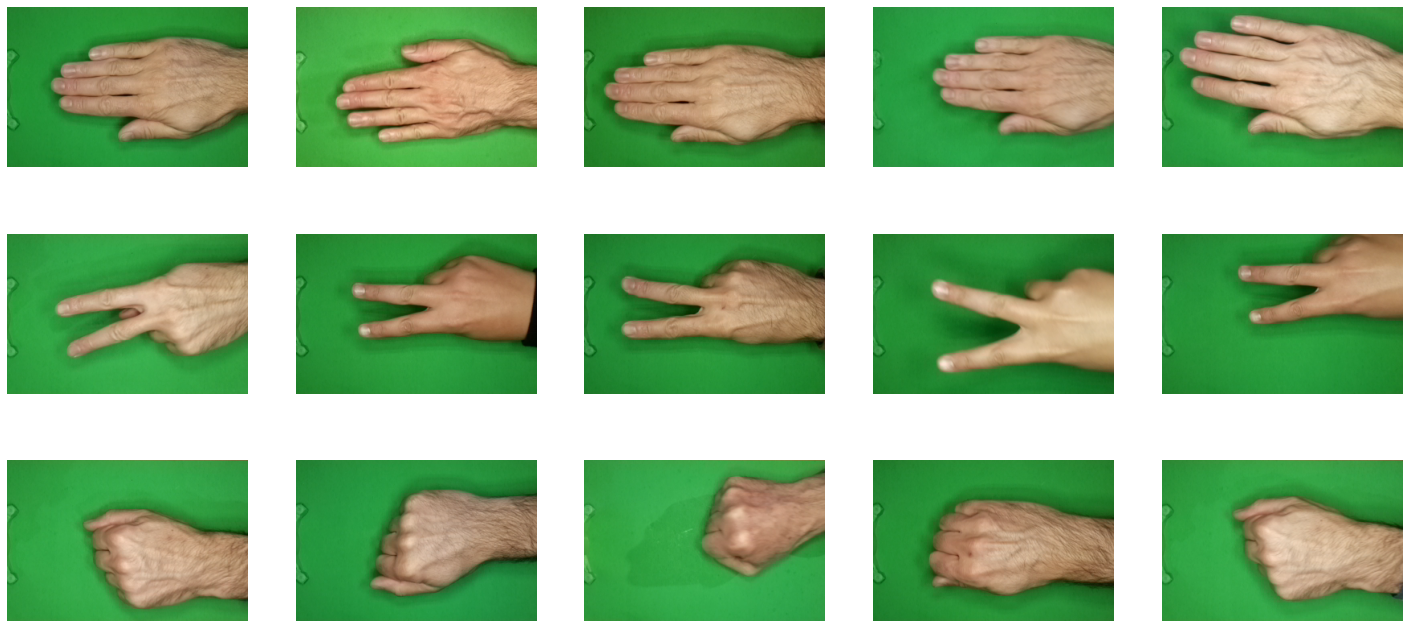

In [ ]:
import os
kertas = os.path.join('/tmp/rockpaperscissors/paper')
gunting = os.path.join('/tmp/rockpaperscissors/scissors')
batu = os.path.join('/tmp/rockpaperscissors/rock')

list_kertas = os.listdir(kertas)
list_gunting = os.listdir(gunting)
list_batu = os.listdir(batu)

print('Jumlah total list kertas :', len(list_kertas))
print('Jumlah total list gunting :', len(list_gunting))
print('Jumlah total list batu :', len(list_batu))

print('\nBeberapa tampilan gambar dari masing-masing katagori')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 5

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 4)

pic_index += 5
gambar_kertas = [os.path.join(kertas, name)
                 for name in list_kertas[pic_index-5:pic_index]]

gambar_gunting = [os.path.join(gunting, name)
                  for name in list_gunting[pic_index-5:pic_index]]

gambar_batu = [os.path.join(batu, name)
                for name in list_batu[pic_index-5:pic_index]]

for i, img_path in enumerate(gambar_kertas + gambar_gunting + gambar_batu):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
train_data = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4
                    )

train_generator = train_data.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        class_mode='categorical',
        shuffle = True,
        subset = 'training'
        )

validation_generator = train_data.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        class_mode='categorical',
        shuffle = True,
        subset = 'validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=15,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
Foto merupakan bentuk gunting


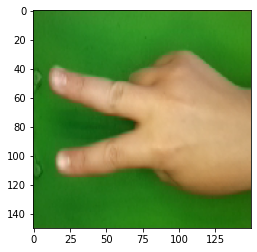

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Foto merupakan bentuk kertas')
  elif classes[0][1]==1:
    print('Foto merupakan bentuk batu')
  else:
    print('Foto merupakan bentuk gunting')